# Classification project

## 1.Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


## 2.Preprocessing

In [2]:
df = pd.read_csv('16325569497737558.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# split X,y
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# normalize
skaler = StandardScaler().fit(X)
X = skaler.transform(X)

# split train,test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train,y_train

(array([[ 0.62133012,  0.68100522, -0.93851463, ..., -0.64911323,
          1.24459328,  1.12302895],
        [ 1.61392956,  0.68100522,  1.97312292, ..., -0.64911323,
          0.26508221, -0.51292188],
        [-0.04040284,  0.68100522, -0.93851463, ...,  0.97635214,
         -0.71442887, -0.51292188],
        ...,
        [-2.7976235 ,  0.68100522,  0.03203122, ...,  0.97635214,
         -0.71442887, -0.51292188],
        [-0.48155814, -1.46841752,  1.00257707, ..., -0.64911323,
         -0.71442887, -0.51292188],
        [ 0.9521966 ,  0.68100522, -0.93851463, ..., -0.64911323,
          0.26508221,  1.12302895]]),
 array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
        0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
        1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
   

## 3.Model

##### 3-1.KNN

In [13]:
ks = 10
acc_train_knn = np.zeros((ks-1))
acc_test_knn = np.zeros((ks-1))

for i in range(1,ks):
    model_knn = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    y_hat_train_knn = model_knn.predict(X_train)
    y_hat_test_knn = model_knn.predict(X_test)
    
    acc_train_knn[i-1] = accuracy_score(y_train, y_hat_train_knn)
    acc_test_knn[i-1] = accuracy_score(y_test, y_hat_test_knn)

Best k in range 1 to 9 for parameter k in KNN is: 9
accuracy_score train: 0.871900826446281
accuracy_score test: 0.8688524590163934


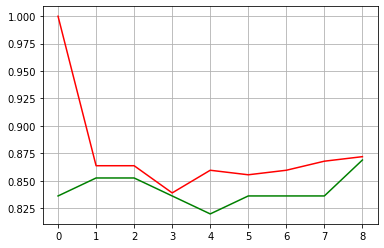

In [18]:
plt.plot(np.arange(ks-1),acc_train_knn, 'r')
plt.plot(np.arange(ks-1),acc_test_knn, 'g')
plt.grid()
print('Best k in range 1 to 9 for parameter k in KNN is:',acc_test_knn.argmax()+1)
print('accuracy_score train:',acc_train_knn[acc_test_knn.argmax()])
print('accuracy_score test:',acc_test_knn[acc_test_knn.argmax()])

##### 3-2.Decision tree

In [1]:
model_tree = DecisionTreeClassifier(criterion='gini').fit(X_train, y_train)
y_hat_train_tree = model_tree.predict(X_train)
y_hat_test_tree = model_tree.predict(X_test)

acc_train_tree = accuracy_score(y_train, y_hat_train_tree)
acc_test_tree = accuracy_score(y_test, y_hat_test_tree)
print('accuracy_score train:',acc_train_tree)
print('accuracy_score test:',acc_test_tree)

NameError: name 'DecisionTreeClassifier' is not defined

##### 3-3.Logistic regression

In [6]:
acc_matrix = np.empty([20,4])
cs = np.array([0.01,0.03,0.06,1])
solvers = np.array(['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])

index = 0
for s in range(len(solvers)):
    for c in range(len(cs)):
        model = LogisticRegression(C=cs[c], solver=solvers[s]).fit(X_train, y_train)
        y_hat_test_log = model.predict(X_test)
        y_hat_train_log = model.predict(X_train)

        acc_matrix[index,0] = s
        acc_matrix[index,1] = cs[c]
        acc_matrix[index,2] =accuracy_score(y_hat_test_log, y_test)
        acc_matrix[index,3] =accuracy_score(y_hat_train_log, y_train)
        index += 1

index = acc_matrix[:,-2].argmax()
print('Best C and solver for this problem are :')
print('C :',acc_matrix[index,1])
print('solver :',solvers[acc_matrix[index,0].astype(int)])
print('accuracy_score train:',acc_matrix[index,3])
print('accuracy_score test:',acc_matrix[index,2])

Best C and solver for this problem are :
C : 0.01
solver : liblinear
accuracy_score train: 0.8181818181818182
accuracy_score test: 0.9016393442622951


##### 3-4.SVM

In [8]:
acc_matrix = np.empty([4,3])
kernel = np.array(['linear', 'poly', 'rbf', 'sigmoid'])

index = 0
for k in range(len(kernel)):
    model = svm.SVC(kernel=kernel[k])
    model.fit(X_train, y_train)
    y_hat_test_svm = model.predict(X_test)
    y_hat_train_svm = model.predict(X_train)

    acc_matrix[index,0] = k
    acc_matrix[index,1] =accuracy_score(y_hat_test_svm, y_test)
    acc_matrix[index,2] =accuracy_score(y_hat_train_svm, y_train)
    index += 1

index = acc_matrix[:,-2].argmax()
print('Best kernel for this problem is :',kernel[acc_matrix[index,0].astype(int)])
print('accuracy_score train:',acc_matrix[index,2])
print('accuracy_score test:',acc_matrix[index,1])

Best kernel for this problem is : poly
accuracy_score train: 0.9090909090909091
accuracy_score test: 0.8852459016393442


#### Conclusion

In [9]:
d = {'model':['KNN','Decision tree','Logistic regression','SVM'],
'train acc':[0.871,1,0.818,0.909],
'test acc':[0.868,0.868,0.901,0.885],
'description':['k=9',np.NAN,'C=0.01 , solver=liblinear','kernel=poly']}

In [12]:
result = pd.DataFrame(data=d)
result.sort_values(by='test acc', ascending=False)

,model,train acc,test acc,description
2,Logistic regression,0.818,0.901,"C=0.01 , solver=liblinear"
3,SVM,0.909,0.885,kernel=poly
0,KNN,0.871,0.868,k=9
1,Decision tree,1.000,0.868,NaN


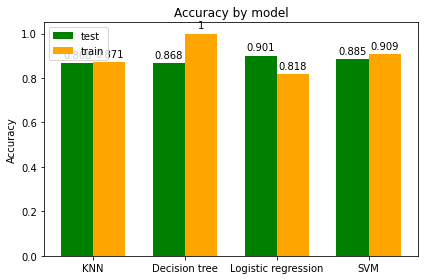

In [38]:
x = np.arange(4) 
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, result['test acc'],width, label='test',color='green')
rects2 = ax.bar(x + width/2, result['train acc'],width, label='train',color='orange')

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by model')
ax.set_xticks(x,result['model'])
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()
plt.show()